In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train=train['features'],train['labels']
x_test,y_test=test['features'],test['labels']
x_valid,y_valid=valid['features'],valid['labels']

In [4]:
print(x_train.shape,y_train.shape)

(34799, 32, 32, 3) (34799,)


In [5]:
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


9

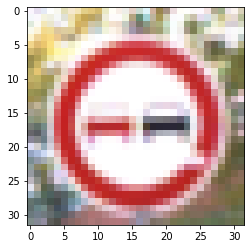

In [6]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

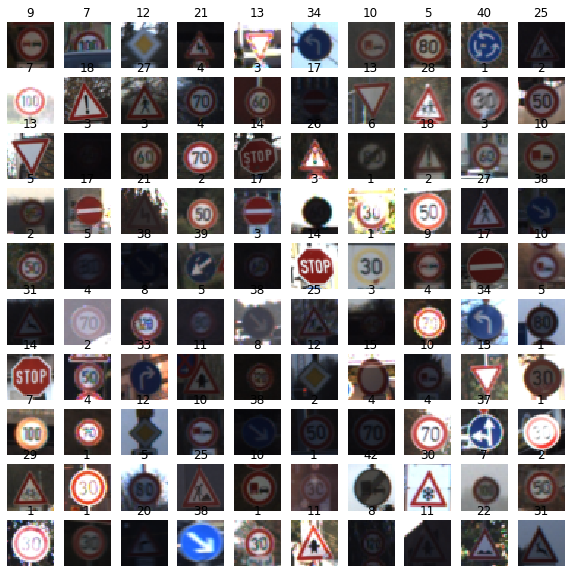

In [7]:
W_grid = 10
L_grid = 10



fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() 
n_training = len(x_train) 

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

        

grayscale and normalise

In [18]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [19]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)

In [37]:
x_train_gray_norm=(x_train_gray-128)/128
print(x_train_gray_norm.shape)
print(y_train.shape)

(34799, 32, 32, 1)
(34799,)


In [39]:
x_valid_gray=np.sum(x_valid/3,axis=3,keepdims=True)
x_valid_gray_norm=(x_valid_gray-128)/128
print(x_valid_gray_norm.shape)
print(y_valid.shape)

(4410, 32, 32, 1)
(4410,)


In [40]:
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)
x_test_gray_norm=(x_test_gray-128)/128
print(x_test_gray_norm.shape)
print(y_test.shape)

(12630, 32, 32, 1)
(12630,)


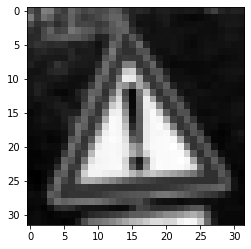

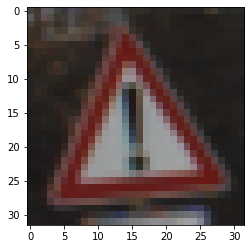

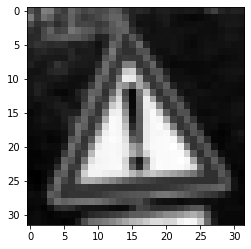

In [25]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

building neural network

In [28]:
from tensorflow.keras import datasets, layers, models
model=models.Sequential([
    tf.keras.layers.Conv2D(8,(5,5),activation='relu',input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(43,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

In [30]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [45]:
history=model.fit(x_train_gray_norm,y_train,batch_size=500,epochs=20,verbose=1,
                 validation_data=(x_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 5s 148us/sample - loss: 0.0421 - accuracy: 0.9913 - val_loss: 0.4402 - val_accuracy: 0.9088
Epoch 2/20
34799/34799 [==============================] - 5s 145us/sample - loss: 0.0372 - accuracy: 0.9924 - val_loss: 0.4036 - val_accuracy: 0.9023
Epoch 3/20
34799/34799 [==============================] - 5s 148us/sample - loss: 0.0349 - accuracy: 0.9930 - val_loss: 0.4633 - val_accuracy: 0.9016
Epoch 4/20
34799/34799 [==============================] - 5s 149us/sample - loss: 0.0307 - accuracy: 0.9942 - val_loss: 0.4408 - val_accuracy: 0.9002
Epoch 5/20
34799/34799 [==============================] - 5s 150us/sample - loss: 0.0261 - accuracy: 0.9955 - val_loss: 0.4125 - val_accuracy: 0.9141
Epoch 6/20
34799/34799 [==============================] - 5s 149us/sample - loss: 0.0288 - accuracy: 0.9939 - val_loss: 0.4797 - val_accuracy: 0.9036
Epoch 7/20
34799/34799 [===========================

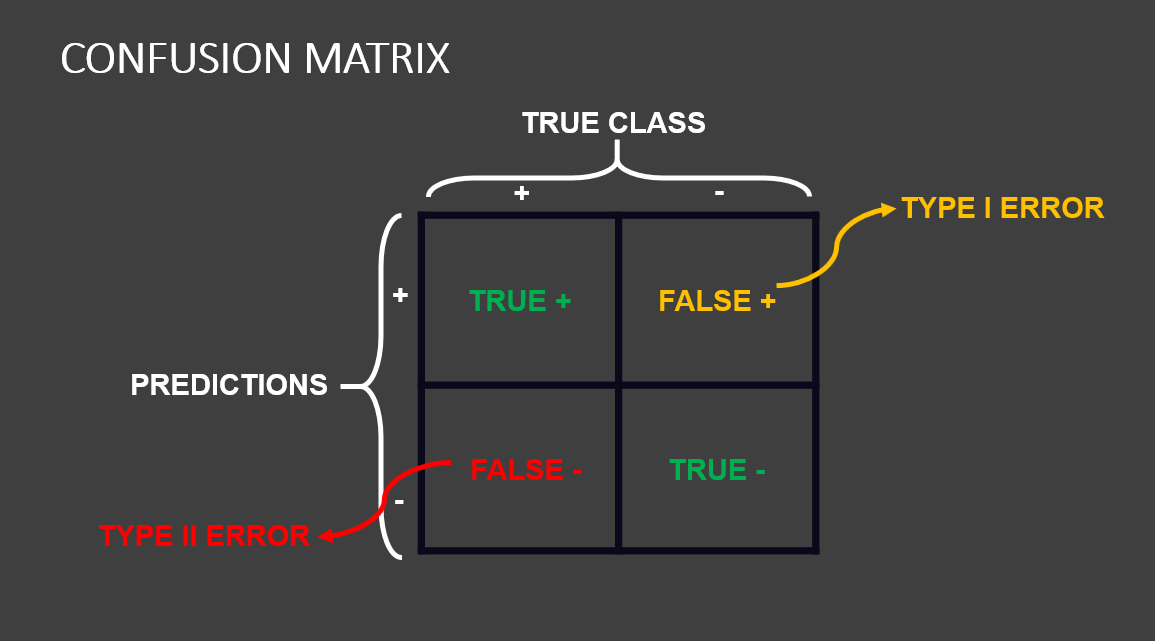

In [47]:
score = model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 385us/sample - loss: 0.8698 - accuracy: 0.9014
Test Accuracy: 0.9014251828193665


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation losses')

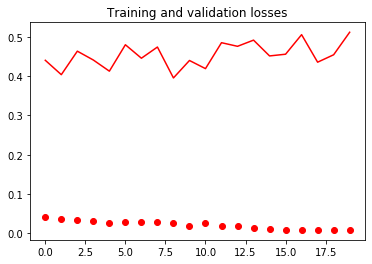

In [52]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training-loss')
plt.plot(epochs,val_loss,'r',label='Validation-loss')
plt.title('Training and validation losses')


Text(0.5, 1.0, 'Training and validation accuracy')

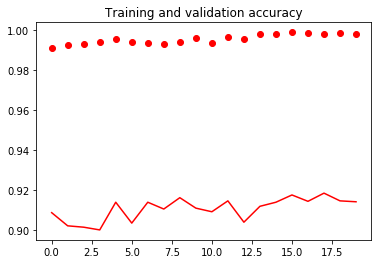

In [54]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training-accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation-accuracy')
plt.title('Training and validation accuracy')


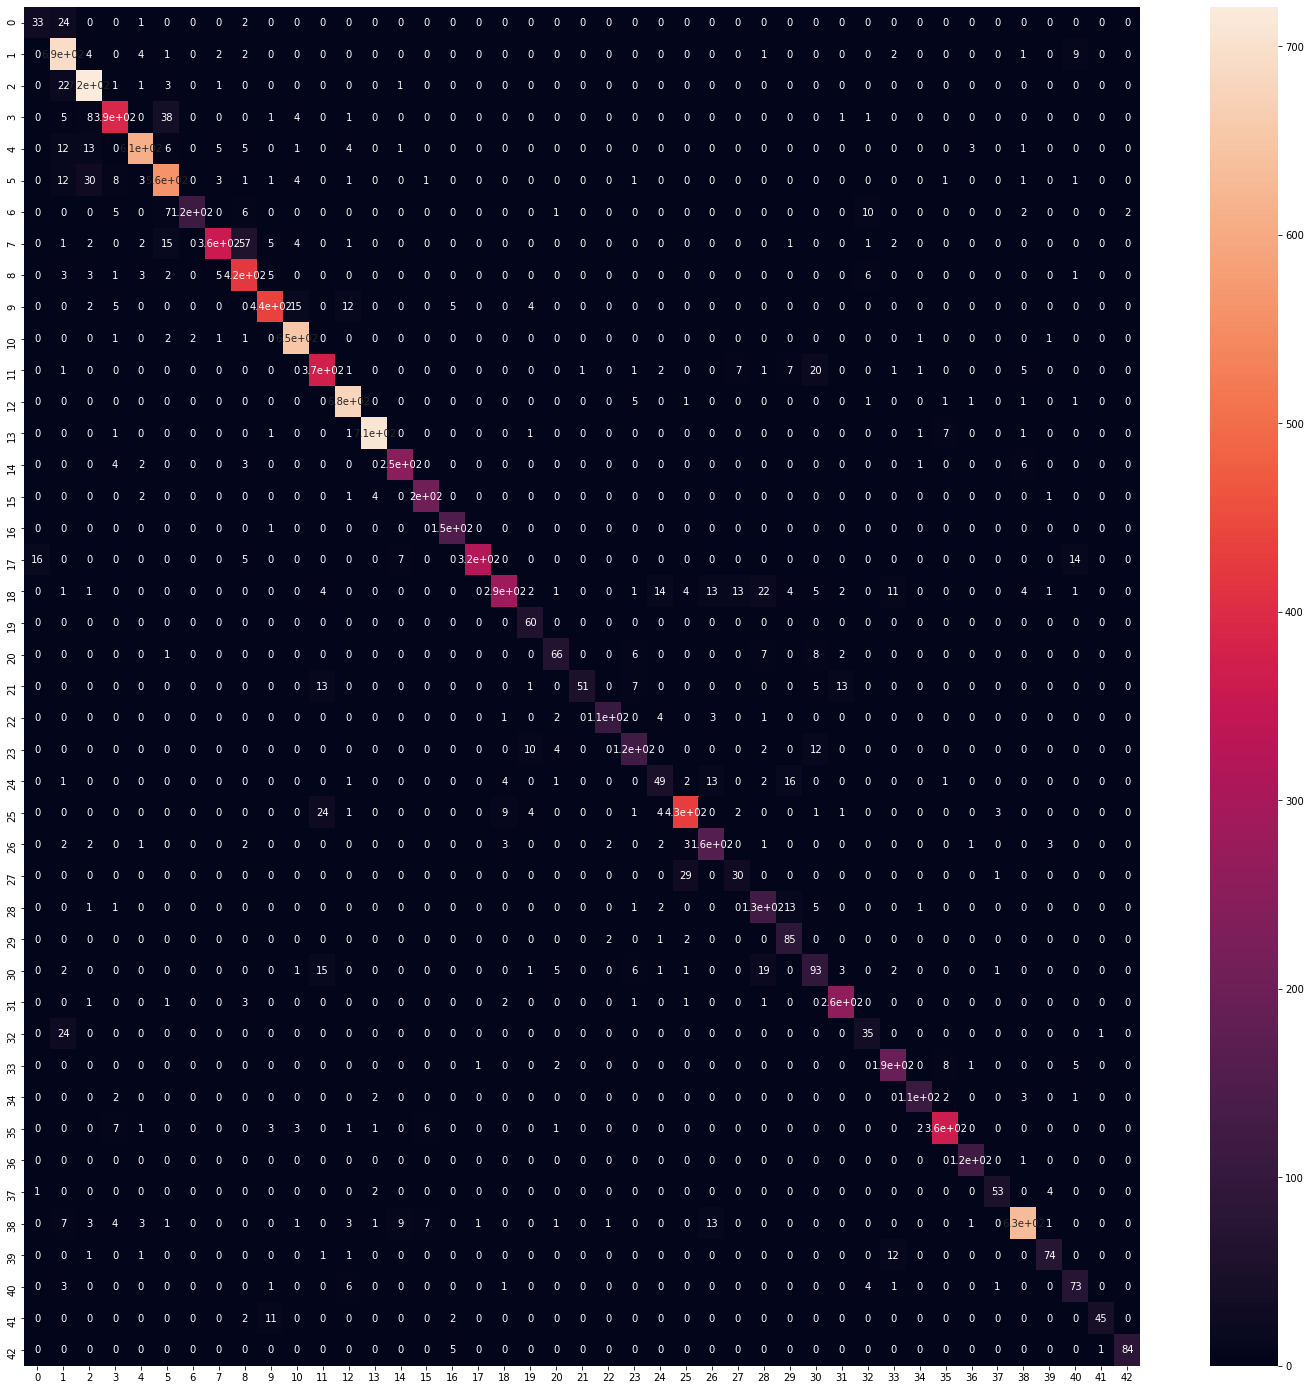

In [56]:
predicted_classes = model.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

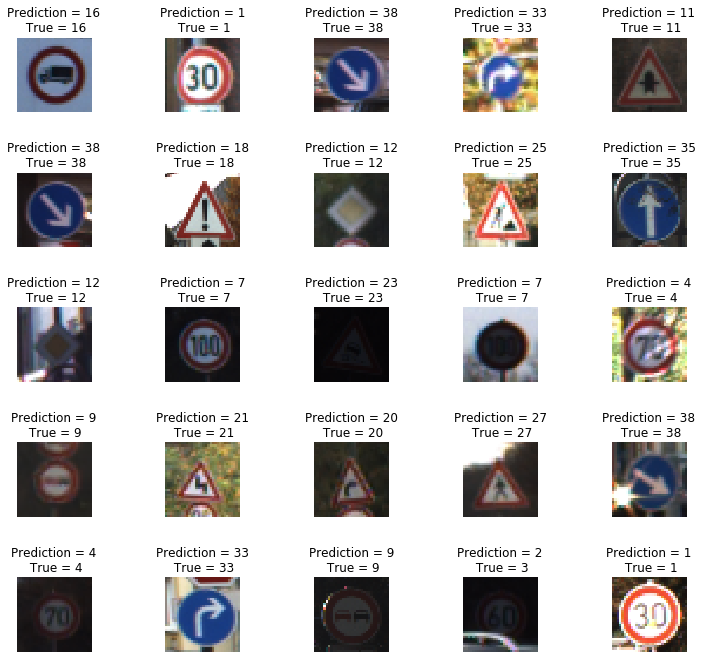

In [57]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }